# Model

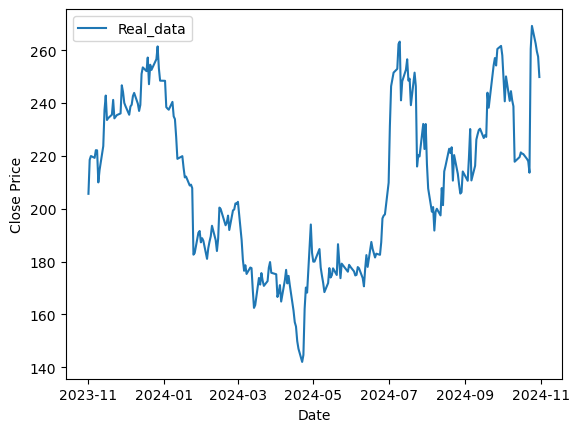

In [17]:
# Outlook on the Close trend
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
dataframe = pd.read_csv('tsla.csv', usecols=['Date','Close'], index_col=False)
#dataframe = dataframe.iloc[::-1]
#print(dataframe)
plt.plot(pd.to_datetime(dataframe['Date']), dataframe['Close'],label='Real_data')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('tsla.csv', usecols=['Close'], index_col=False)
#print(dataframe.head())
#print(dataframe)
#dataframe = dataframe.iloc[::-1]

dataframe = dataframe.reset_index(drop=True)
# dataframe = dataframe[dataframe.columns[::-1]]
dataframe 

,Close
0,205.660004
1,218.509995
2,219.960007
3,219.270004
4,222.179993
...,...
247,269.190002
248,262.510010
249,259.519989
250,257.549988


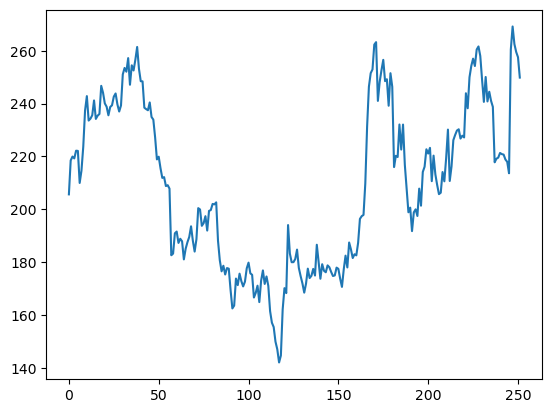

In [21]:
plt.plot(dataframe.index, dataframe['Close'])
plt.show()

In [23]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation
from keras.layers import LSTM
from keras.optimizers import Adam,RMSprop
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [25]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [27]:
# Conversuin of our data to floats as it is more suitable for this neural networks
# print(dataframe)
dataset = dataframe.values
print(dataset)
dataset = dataset.astype('float32')

[[205.66000366]
 [218.50999451]
 [219.96000671]
 [219.27000427]
 [222.17999268]
 [222.11000061]
 [209.97999573]
 [214.6499939 ]
 [223.71000671]
 [237.41000366]
 [242.83999634]
 [233.58999634]
 [234.30000305]
 [235.6000061 ]
 [241.19999695]
 [234.21000671]
 [235.44999695]
 [236.08000183]
 [246.72000122]
 [244.13999939]
 [240.08000183]
 [238.83000183]
 [235.58000183]
 [238.72000122]
 [239.36999512]
 [242.63999939]
 [243.83999634]
 [239.74000549]
 [237.00999451]
 [239.28999329]
 [251.05000305]
 [253.5       ]
 [252.08000183]
 [257.22000122]
 [247.13999939]
 [254.5       ]
 [252.53999329]
 [256.60998535]
 [261.44000244]
 [253.17999268]
 [248.47999573]
 [248.41999817]
 [238.44999695]
 [237.92999268]
 [237.49000549]
 [240.44999695]
 [234.96000671]
 [233.94000244]
 [227.22000122]
 [218.88999939]
 [219.91000366]
 [215.55000305]
 [211.88000488]
 [212.19000244]
 [208.80000305]
 [209.13999939]
 [207.83000183]
 [182.63000488]
 [183.25      ]
 [190.92999268]
 [191.58999634]
 [187.28999329]
 [188.86

In [29]:
print(len(dataset))
train_size = int(len(dataset)-63)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# print(train)

252
189 63


In [31]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

# Normalize the test data using the same scaler (without fitting it again)
test = scaler.transform(test)

In [33]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [35]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(testY)
# print(trainX)

[0.41011453 0.46852565 0.47809577 0.45738804 0.54269445 0.4894811
 0.5947528  0.61108804 0.66553915 0.6521739  0.6700767  0.5660424
 0.64573884 0.58708024 0.55407965 0.52553415 0.52990675 0.5945053
 0.56554735 0.63823116 0.7270026  0.5666199  0.61232567 0.69400203
 0.7101724  0.72403264 0.72799265 0.6990347  0.70802724 0.70249975
 0.84044206 0.79366386 0.89060295 0.9258312  0.9485189  0.92541873
 0.9768995  0.98655236 0.9567691  0.88251793 0.81354666 0.8912631
 0.81494915 0.8452271  0.81676424 0.79795396 0.6249484  0.6361686
 0.63955116 0.65407145 0.6504413  0.6488738  0.6336111  0.6263509
 0.5907103  0.9770647  1.0489234  0.99381244 0.9691442  0.95289147]


In [37]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, Conv2D, MaxPooling2D,MaxPooling1D
cnn = Sequential()
cnn.add(Conv1D(4, kernel_size=2, strides=1,padding='same',
                 activation='relu',
                 input_shape=(2,1)))
cnn.add(MaxPooling1D(pool_size=2))
  
cnn.add(Flatten())
cnn.add(Dense(30))

cnn.add(Dense(1))
cnn.summary()
cnn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model

E:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 4)           │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_weights_cnn.hdf5

In [45]:
print(trainX.shape)
x_train2 = trainX.reshape((186,2,1))
print(x_train2.shape)
print(trainY.shape)
print(testX.shape)
x_test2 = testX.reshape((60,2,1))

# cnn.fit(x_train2, trainY, epochs=100, batch_size=1, verbose=2)

(186, 1, 2)
(186, 2, 1)
(186,)
(60, 1, 2)


In [47]:
cnn.fit(x_train2,trainY, batch_size=1,verbose=2,epochs=100)

Epoch 1/100
186/186 - 1s - 5ms/step - loss: 0.1069
Epoch 2/100
186/186 - 0s - 1ms/step - loss: 0.0101
Epoch 3/100
186/186 - 0s - 992us/step - loss: 0.0046
Epoch 4/100
186/186 - 0s - 1ms/step - loss: 0.0043
Epoch 5/100
186/186 - 0s - 1ms/step - loss: 0.0045
Epoch 6/100
186/186 - 0s - 1ms/step - loss: 0.0045
Epoch 7/100
186/186 - 0s - 1ms/step - loss: 0.0043
Epoch 8/100
186/186 - 0s - 991us/step - loss: 0.0044
Epoch 9/100
186/186 - 0s - 1ms/step - loss: 0.0044
Epoch 10/100
186/186 - 0s - 1ms/step - loss: 0.0042
Epoch 11/100
186/186 - 0s - 2ms/step - loss: 0.0046
Epoch 12/100
186/186 - 0s - 2ms/step - loss: 0.0041
Epoch 13/100
186/186 - 0s - 1ms/step - loss: 0.0044
Epoch 14/100
186/186 - 0s - 2ms/step - loss: 0.0046
Epoch 15/100
186/186 - 0s - 1ms/step - loss: 0.0041
Epoch 16/100
186/186 - 0s - 1ms/step - loss: 0.0045
Epoch 17/100
186/186 - 0s - 1ms/step - loss: 0.0039
Epoch 18/100
186/186 - 0s - 1ms/step - loss: 0.0042
Epoch 19/100
186/186 - 0s - 1ms/step - loss: 0.0043
Epoch 20/100
186/

In [48]:
trainPredict = cnn.predict(x_train2)
testPredict = cnn.predict(x_test2)
# invert predictions
# print(trainPredict)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[218.40924]
 [220.98088]
 [220.49805]
 [223.0657 ]
 [223.28732]
 [212.29572]
 [215.33678]
 [223.99878]
 [237.29265]
 [243.55173]
 [235.70692]
 [235.44391]
 [236.69072]
 [241.88933]
 [236.10774]
 [236.54605]
 [237.23802]
 [246.9352 ]
 [245.64082]
 [241.71147]
 [240.18185]
 [237.11627]
 [239.64151]
 [240.53766]
 [243.5626 ]
 [244.96956]
 [241.3742 ]
 [238.50038]
 [240.29774]
 [251.17073]
 [254.5412 ]
 [253.49524]
 [258.01086]
 [249.38599]
 [255.06386]
 [254.00972]
 [257.5035 ]
 [262.2761 ]
 [255.26904]
 [250.20378]
 [249.68913]
 [240.65456]
 [239.20718]
 [238.75781]
 [241.39522]
 [236.71349]
 [235.25208]
 [229.06665]
 [220.86497]
 [220.97282]
 [217.12436]
 [213.37384]
 [213.29514]
 [210.25555]
 [210.23143]
 [209.07843]
 [186.12936]
 [184.22272]
 [191.23833]
 [192.5882 ]
 [188.75883]
 [189.75946]
 [189.05292]
 [182.7566 ]
 [185.7443 ]
 [188.38582]
 [190.42178]
 [194.24709]
 [189.71346]
 [185.4587 ]
 [189.30336]
 

In [49]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Train Score: 7.10 RMSE
Test Score: 9.30 RMSE


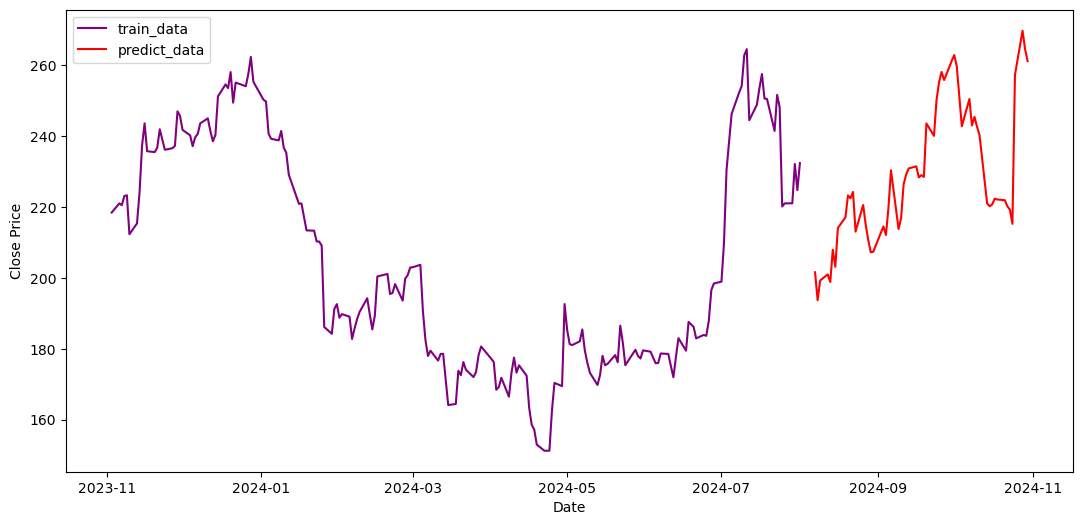

In [77]:
# shift train predictions for plotting
dataframe1 = pd.read_csv('tsla.csv', usecols=['Date'], index_col=False)

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(13, 6)
fig.savefig('test2png.png',dpi=100)

# plt.plot(scaler.inverse_transform(dataset))
plt.plot(pd.to_datetime(dataframe1['Date']),trainPredictPlot, color='purple',label='train_data')
plt.plot(pd.to_datetime(dataframe1['Date']),testPredictPlot, color='red',label='predict_data')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [79]:
import csv
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md
import mpl_finance as mpf
import matplotlib.pyplot as plt
import os
from datetime import datetime
Data_Predict=[]

Data_Predict = numpy.empty_like(dataset)
Data_Predict[:, :] = numpy.nan
Data_Predict[look_back:len(trainPredict)+look_back, :] = trainPredict
Data_Predict[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Data_Predict[0:1, :] = dataframe[0:1, :]
# print(Data_Predict)
Close_Predict=[]
Data_Prepare=Data_Predict.tolist()
for sublist in Data_Prepare:
    for item in sublist:
        Close_Predict.append(item)
# print(Data_Predict1)
print(len(Close_Predict))
filename = 'tsla.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    Date, Open, High, Low, Close = [], [], [], [], []
    print(reader)
    for row in reader:      
        current_date = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S%z')
        Date.append(current_date)
        
        Close1 = float(row[4])
        Close.append(Close1)
#         print(Open)
#         High1 = float(row[1])
        High.append(140)
        
#         Low1 = float(row[2])
#         print(type(Low1))
        Low.append(140)

#         Close1 = float(row[4])
#         Close.append(Close_Predict)
#         print(Date)
# print(Low)
datas = []
for i in range(len(Date)):
    datas.append([md.date2num(Date[i]), float(Close[i]), float(High[i]), \
                 float(Low[i]), float(Close_Predict[i])])        

252


([<matplotlib.lines.Line2D at 0x2db9d89c650>,
  <matplotlib.patches.Rectangle at 0x2db9fb44230>])

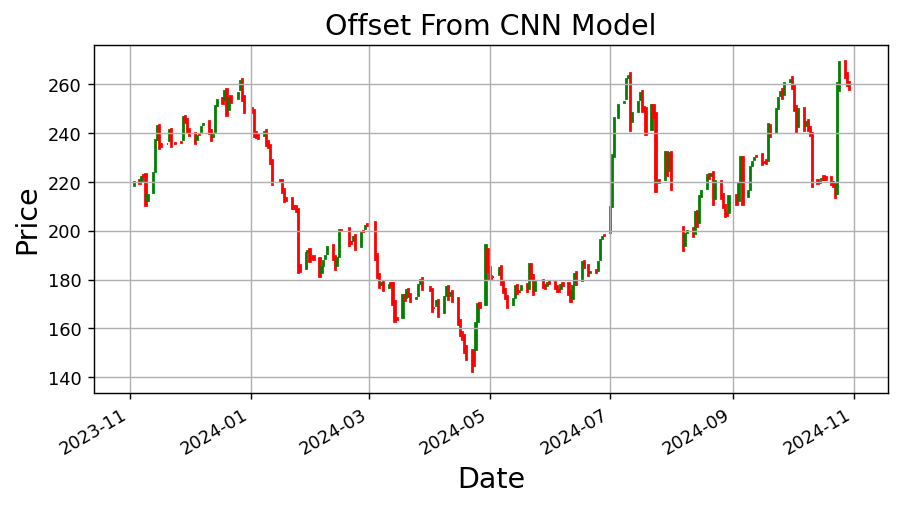

In [83]:
fig = plt.figure(2, dpi =128, figsize =(8,4))
fig.set_size_inches(8, 4)
ax2 = plt.subplot(111)
ax2.set_title('Offset From CNN Model', fontsize =16)
ax2.set_xlabel('Date', fontsize =16)
ax2.set_ylabel('Price', fontsize =16)
ax2.grid(True)                            #显示网格
ax2.xaxis_date()                         #显示为日期
fig.autofmt_xdate()
mpf.candlestick_ohlc(ax2, datas, width =0.6, colorup ='r', colordown ='g')

[nan, nan, -1.5507659912109375, 1.71087646484375, -1.68194580078125, 0.9557037353515625, 13.307327270507812, -2.354278564453125, -8.37322998046875, -13.411224365234375, -5.5473480224609375, 9.96173095703125, 1.40692138671875, -0.156097412109375, -4.50927734375, 7.6793212890625, 0.657745361328125, 0.4660491943359375, -9.481979370117188, 2.795196533203125, 5.560821533203125, 2.8814697265625, 4.6018524169921875, -1.603729248046875, 0.271514892578125, -2.1023406982421875, -0.2773895263671875, 5.22955322265625, 4.3642120361328125, -0.78961181640625, -10.75225830078125, -2.3292694091796875, 2.4611968994140625, -3.724761962890625, 10.870864868164062, -5.114013671875, 2.52386474609375, -2.6002655029296875, -3.936492919921875, 9.096099853515625, 6.7890472412109375, 1.783782958984375, 11.2391357421875, 2.7245635986328125, 1.7171783447265625, -1.6921844482421875, 6.435211181640625, 2.7734832763671875, 8.032073974609375, 10.176651000976562, 0.9549713134765625, 5.422821044921875, 5.244354248046875,

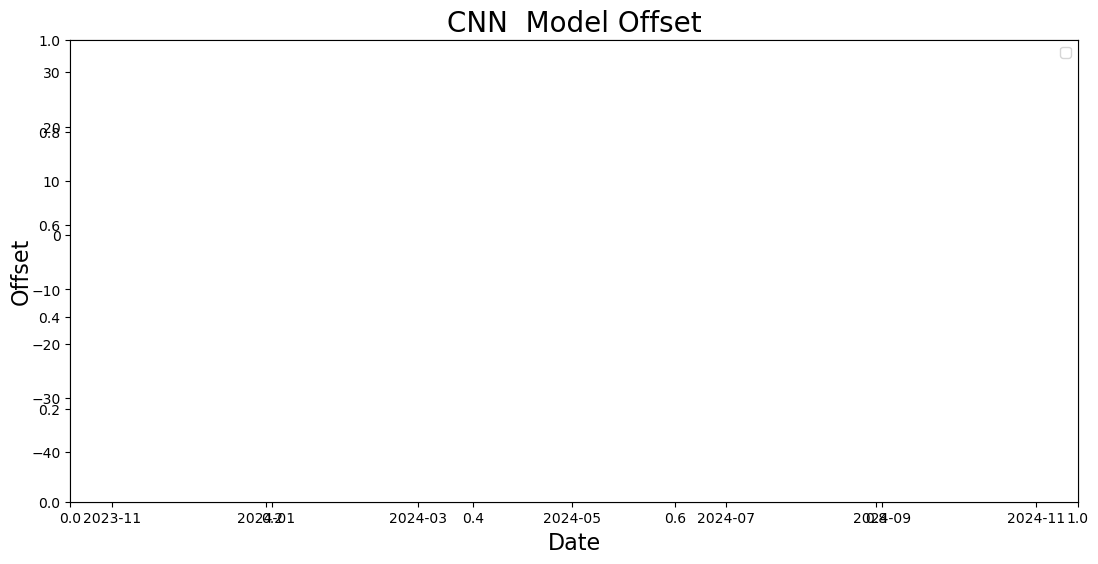

In [73]:
Data_Analysis = []
fig=plt.figure()
for i in range(len(Close)):
    Data_Analysis.append(float(Close_Predict[i])-float(Close[i]))
print(Data_Analysis)

rects=plt.bar(Date, Data_Analysis,label='offset')
plt.plot(Date, Data_Analysis, color='yellow')
# plt.hist(Date, Data_Analysis, normed=1, facecolor='blue', alpha=0.5)  
# for rect in rects:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width() / 2, height, str(Data_Analysis), ha='center', va='bottom')
# for xx, yy in zip(len(Data_Analysis),Data_Analysis):
#     plt.text(xx, yy+0.1, yy, ha='center')
# plt.plot(pd.to_datetime(dataframe1['Date']), scaler.inverse_transform(dataset),label='Real_data')
fig.set_size_inches(13, 6)
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Date', fontsize =16)
ax.set_ylabel('Offset', fontsize =16)
ax.set_title("CNN  Model Offset",fontsize=20)
plt.legend(['Offset'],loc='upper right')
plt.show()

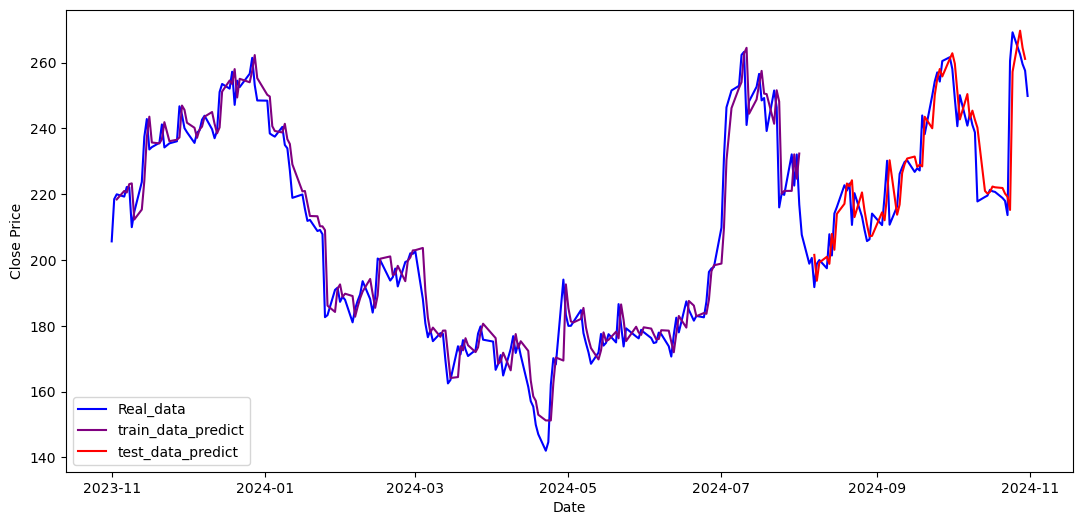

In [85]:
# Load original data for real prices
dataframe1 = pd.read_csv('tsla.csv', usecols=['Date', 'Close'], index_col=False)
dataframe1['Date'] = pd.to_datetime(dataframe1['Date'])

# Plot using the unscaled "Real data"
plt.plot(dataframe1['Date'], dataframe1['Close'], label='Real_data', color='blue')

# Plot the predictions (already inverse transformed in your code)
plt.plot(dataframe1['Date'], trainPredictPlot, color='purple', label='train_data_predict')
plt.plot(dataframe1['Date'], testPredictPlot, color='red', label='test_data_predict')

plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(13, 6)
plt.show()

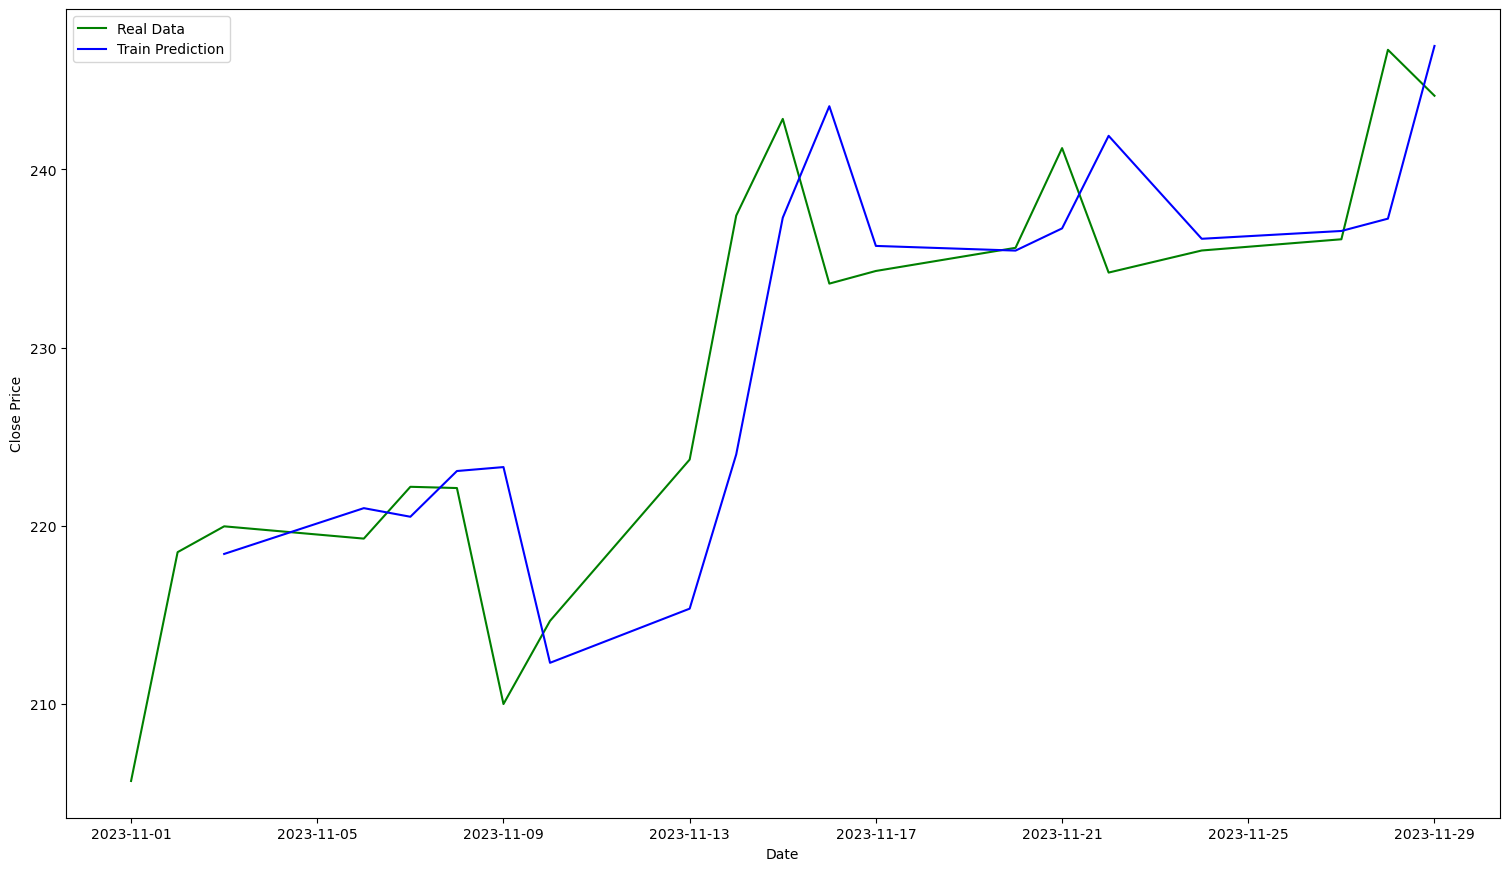

In [101]:
# Use the original Close prices without any scaling for Real Data
result_o = dataframe1[['Date', 'Close']]

# Prepare DataFrames for train and test predictions (inverse-transformed)
df_train = pd.DataFrame(trainPredictPlot, columns=["Close"])
result_train = pd.concat([dataframe1['Date'], df_train], axis=1)

df_test = pd.DataFrame(testPredictPlot, columns=["Close"])
result_test = pd.concat([dataframe1['Date'], df_test], axis=1)

# Plot the first 20 data points for Real, Train, and Test predictions
plt.plot(result_o['Date'].head(20), result_o['Close'].head(20), color='green', label='Real Data')
plt.plot(result_train['Date'].head(20), result_train['Close'].head(20), color='blue', label='Train Prediction')

plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [95]:
result_train

,Date,Close
0,2023-11-01 00:00:00+00:00,NaN
1,2023-11-02 00:00:00+00:00,NaN
2,2023-11-03 00:00:00+00:00,218.409241
3,2023-11-06 00:00:00+00:00,220.980881
4,2023-11-07 00:00:00+00:00,220.498047
...,...,...
247,2024-10-25 00:00:00+00:00,NaN
248,2024-10-28 00:00:00+00:00,NaN
249,2024-10-29 00:00:00+00:00,NaN
250,2024-10-30 00:00:00+00:00,NaN


In [97]:
result_test.tail(24)

,Date,Close
228,2024-09-30 00:00:00+00:00,261.154541
229,2024-10-01 00:00:00+00:00,262.825226
230,2024-10-02 00:00:00+00:00,259.670654
231,2024-10-03 00:00:00+00:00,251.166840
232,2024-10-04 00:00:00+00:00,242.714661
233,2024-10-07 00:00:00+00:00,250.426514
234,2024-10-08 00:00:00+00:00,242.972427
235,2024-10-09 00:00:00+00:00,245.389984
236,2024-10-10 00:00:00+00:00,242.625153
237,2024-10-11 00:00:00+00:00,240.222519


# Trade

In [125]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Assuming 'cnn' is your trained CNN model and 'scaler' is the scaler used for your data
# The variable 'dataset' should contain the last known data points as input for future predictions

# Step 1: Get the last data point from your dataset for prediction input
last_data_point = dataset[-2:]  # Uses the last two entries if 'look_back' is 2 as in your setup
last_data_point_scaled = scaler.transform(last_data_point)  # Scale the input
last_data_point_scaled = last_data_point_scaled.reshape((1, 2, 1))  # Reshape to fit the model input shape (samples, time steps, features)

# Step 2: Predict for the next 5 business days
num_days_to_predict = 5
predicted_prices = []

for _ in range(num_days_to_predict):
    # Predict the next day
    prediction_scaled = cnn.predict(last_data_point_scaled)
    
    # Inverse transform the prediction to the original scale
    prediction = scaler.inverse_transform(prediction_scaled)[0][0]
    
    # Store the predicted value
    predicted_prices.append(prediction)
    
    # Update the last_data_point with the new prediction (scaled)
    last_data_point_scaled = np.roll(last_data_point_scaled, -1)
    last_data_point_scaled[0, -1, 0] = prediction_scaled  # Use the scaled prediction for consistency

# Step 3: Create a DataFrame with the predictions
last_date = pd.to_datetime(dataframe1['Date'].iloc[-1])  # Start from the last known date in your data
future_dates = pd.bdate_range(start=last_date, periods=num_days_to_predict+1)[1:]  # Generate the next 5 business days

# Combine dates and predictions
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': predicted_prices})

# Display forecast
print(forecast_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\15868\AppData\Local\Temp\ipykernel_6500\3097879547.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data_point_scaled[0, -1, 0] = prediction_scaled  # Use the scaled prediction for consistency
C:\Users\15868\AppData\Local\Temp\ipykernel_6500\3097879547.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data_point_scaled[0, -1, 0] = prediction_scaled  # Use the scaled prediction for consistency
C:\Users\15868\AppData\Local\Temp\ipykernel_6500\3097879547.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
                       Date  Predicted Close
0 2024-11-01 00:00:00+00:00       251.872421
1 2024-11-04 00:00:00+00:00       252.949768
2 2024-11-05 00:00:00+00:00       254.123459
3 2024-11-06 00:00:00+00:00       255.291901
4 2024-11-07 00:00:00+00:00       256.464966


C:\Users\15868\AppData\Local\Temp\ipykernel_6500\3097879547.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data_point_scaled[0, -1, 0] = prediction_scaled  # Use the scaled prediction for consistency
C:\Users\15868\AppData\Local\Temp\ipykernel_6500\3097879547.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data_point_scaled[0, -1, 0] = prediction_scaled  # Use the scaled prediction for consistency


In [129]:
forecast_df.to_csv('predicted_prices.csv', index=False)